### The Spark Foundation
#### GRIPJULY21

### Name: Raj Gaurav
### Data Science & Business Analytics Intern
#### Task-1: Prediction using Supervised ML
#### Description Of Task: Predict the percentage of an student based on the no. of study hours
#### Dataset: http://bit.ly/w-data

First, we will import the three important libraries, which will help us for loading the dataset, plotting the graphs, and creating the Simple Linear Regression model

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data set from URL link
url = "http://bit.ly/w-data"
l_data = pd.read_csv(url)
print("Data loaded successfully")
l_data.head(10)

Data loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


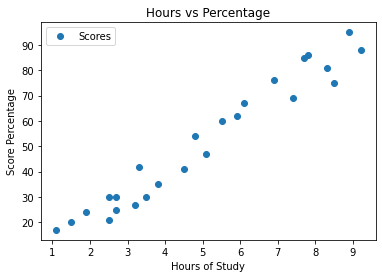

In [3]:
# Plotting distribution of scores
l_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Score Percentage')
plt.show()

After that, we need to extract the dependent and independent variables from the given dataset. The independent variable is study hours, and the dependent variable is score. Below is code for it:

In [4]:
x = l_data.iloc [:, :-1].values
y = l_data.iloc [:, 1].values

In the above lines of code, for x variable, we have taken -1 value since we want to remove the last column from the dataset. For y variable, we have taken 1 value as a parameter, since we want to extract the second column and indexing starts from the zero.

By executing the above line of code, we will get the output for X and Y variable as:

In [5]:
print('Hours', x)
print('Scores',y)

Hours [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Scores [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Next, we will split both variables into the test set and training set. We have 25 observations, so we will take 17 observations for the training set and 8 observations for the test set. We are splitting our dataset so that we can train our model using a training dataset and then test the model using a test dataset. The code for this is given below:

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                test_size=0.3, random_state=0)

# By executing the above code, we will get x-test, x-train and y-test, y-train dataset.

print('Test Dataset x_test\n',x_test, '\n')
print('Test Dataset y_test\n', y_test,'\n')
print('Train Dataset x_train\n',x_train, '\n')
print('Train Dataset y_train\n', y_train, '\n')

Test Dataset x_test
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]] 

Test Dataset y_test
 [20 27 69 30 62 35 24 86] 

Train Dataset x_train
 [[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] 

Train Dataset y_train
 [76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 



Now the next step is to fit our model to the training dataset. To do so, we will import the LinearRegression class of the linear_model library from the scikit learn. After importing the class, we are going to create an object of the class named as a regressor.

In [7]:
# Importing Simple Linear Regression model to train dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Dataset training completed")


Dataset training completed


In the above code, we have used a fit() method to fit our Simple Linear Regression object to the training set. In the fit() function, we have passed the x_train and y_train, which is our training dataset for the dependent and an independent variable. We have fitted our regressor object to the training set so that the model can easily learn the correlations between the predictor and target variables.

Dependent (Score) and an Independent variable (Hours). So, now, our model is ready to predict the output for the new observations. In this step, we will provide the test dataset (new observations) to the model to check whether it can predict the correct output or not.

We will create a prediction vector y_pred, and x_pred, which will contain predictions of test dataset, and prediction of training set respectively.

In [8]:
# Prediction of Test and Training set result
print('Test Data\n',x_test)
y_pred = regressor.predict (x_test) # Predicting scores
print('\nTrain Data\n',x_train)
x_pred= regressor.predict(x_train) 

Test Data
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]

Train Data
 [[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


By comparing these values, we can check how good our model is performing:

In [9]:
# Comparing Actual vs Predicted
ap = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
ap

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


##### Evaluating The Model with mean square error. There are many such metrics.

In [10]:
# Evaluating the model
from sklearn import metrics
print('Mean absolute error:',
     metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.419727808027652


#### Visualizing the Training set results

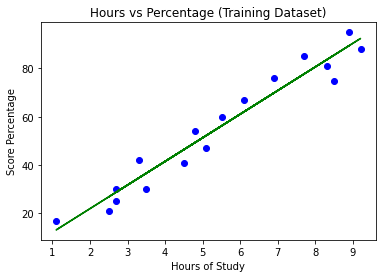

In [11]:
# Visualizing the Training set results
plt.scatter(x_train,y_train, color= "blue")
plt.plot(x_train, x_pred, color="green")
plt.title('Hours vs Percentage (Training Dataset)')
plt.xlabel('Hours of Study')
plt.ylabel('Score Percentage')
plt.show()

#### Visualizing the Test set results

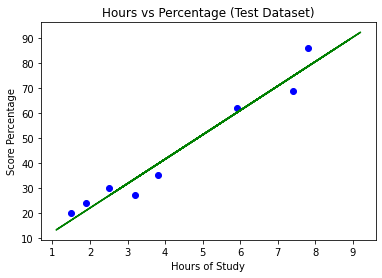

In [12]:
# Visualizing the Test set results
plt.scatter(x_test,y_test, color= "blue")
plt.plot(x_train, x_pred, color="green")
plt.title('Hours vs Percentage (Test Dataset)')
plt.xlabel('Hours of Study')
plt.ylabel('Score Percentage')
plt.show()

#### Testing model with given data in task-1

In [13]:
# Testing model with give data in task-1
hours = [[9.25]]
d_pred = regressor.predict(hours)
print ('No. of Hours = {}'.format(hours))
print ('Predicted Score = {}'. format(d_pred[0]))

No. of Hours = [[9.25]]
Predicted Score = 92.91505723477056
